In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2 as cv

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Database/Train',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3245 files belonging to 3 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Database/Test',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 963 files belonging to 3 classes.


In [3]:
# Dont RUN Done For UNDER-STANDING
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/home/user/TEJAS/Kreeda/DB/CricketIMG',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  '/home/user/TEJAS/Kreeda/DB/CricketIMG',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2614 files belonging to 2 classes.
Using 2092 files for training.
Found 2614 files belonging to 2 classes.
Using 522 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['batting', 'bowling']


KeyboardInterrupt: ignored

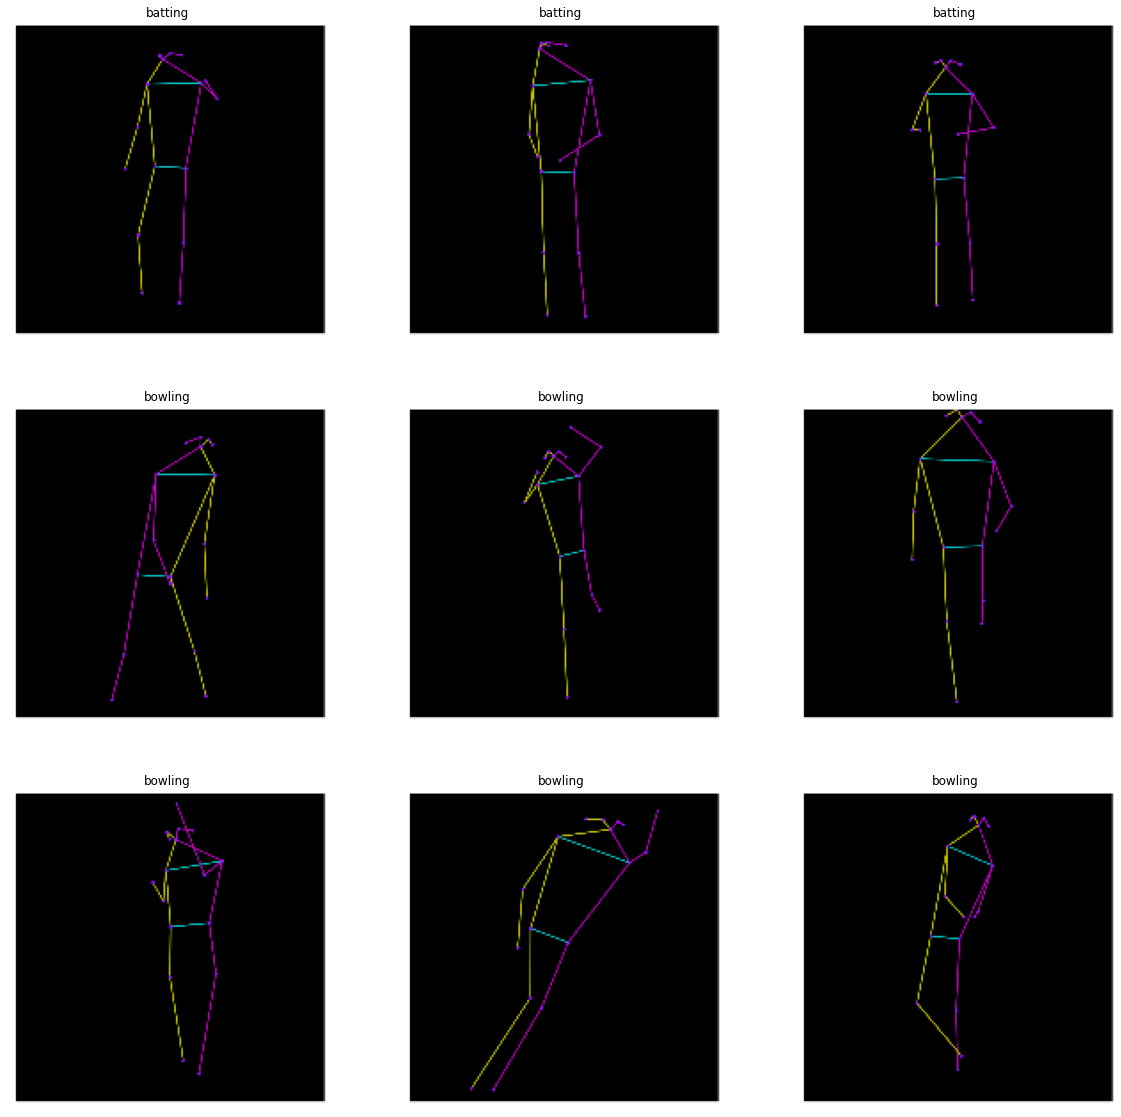

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [5]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


In [6]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [7]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 8)       32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 16)        144       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0

In [10]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
66/66 [==============================] - 5s 26ms/step - loss: 0.4373 - accuracy: 0.7906 - val_loss: 0.2870 - val_accuracy: 0.8851
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.2763 - accuracy: 0.8901 - val_loss: 0.2323 - val_accuracy: 0.9061
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.2108 - accuracy: 0.9211 - val_loss: 0.2133 - val_accuracy: 0.9157
Epoch 4/10
66/66 [==============================] - 2s 25ms/step - loss: 0.1914 - accuracy: 0.9259 - val_loss: 0.2067 - val_accuracy: 0.9195
Epoch 5/10
66/66 [==============================] - 2s 24ms/step - loss: 0.1496 - accuracy: 0.9479 - val_loss: 0.1968 - val_accuracy: 0.9330
Epoch 6/10
66/66 [==============================] - 2s 24ms/step - loss: 0.1227 - accuracy: 0.9560 - val_loss: 0.1967 - val_accuracy: 0.9406
Epoch 7/10
66/66 [==============================] - 2s 24ms/step - loss: 0.1168 - accuracy: 0.9589 - val_loss: 0.1928 - val_accuracy: 0.9406
Epoch 8/10
66

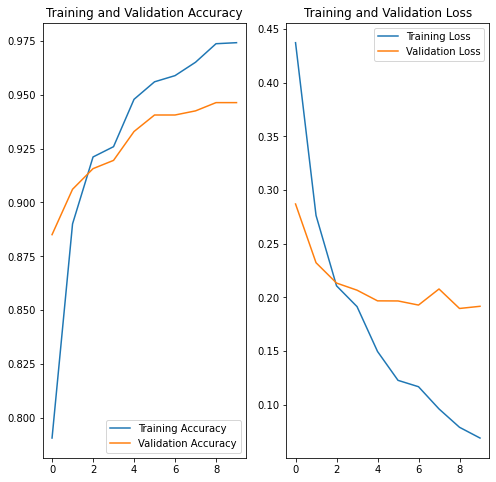

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
from tensorflow.keras.models import load_model
model.save('BOWLING.h5')

In [ ]:
model=load_model('/content/drive/MyDrive/kick_punch_2.h5')

In [ ]:
img = tf.keras.utils.load_img(
    '/content/cap_4.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Punching with a 99.94 percent confidence.


In [ ]:
import os

dir_path = r'/content/drive/MyDrive/Violence_Detection/Database/Train/Kicking/'
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))


730


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
